In [1]:
import math
import collections

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
pd.options.display.max_rows =  20

In [3]:
gapminder = pd.read_csv('gapminder.csv')

In [4]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0


In [7]:
gapminder.describe()

,year,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
count,14740.000000,1.474000e+04,14740.000000,14740.000000,14740.000000,14740.000000,14740.000000
mean,1961.687924,2.252933e+07,56.834526,84.452665,4.643472,9000.506513,1.034650
std,50.480650,9.307143e+07,15.868464,14.472179,1.994833,14912.146692,0.546923
min,1800.000000,2.128000e+03,4.000000,33.217000,1.130000,142.000000,-0.410302
25%,1955.000000,8.990308e+05,44.230000,75.182250,2.630000,1391.000000,0.580737
50%,1975.000000,4.063978e+06,60.080000,89.693000,5.060000,3509.000000,0.982593
75%,1995.000000,1.218722e+07,70.380000,96.870000,6.440000,10244.000000,1.447879
max,2015.000000,1.376049e+09,83.300000,99.810000,9.220000,182668.000000,2.699072


In [5]:
gapminder['log_gdp_per_day'] = np.log10(gapminder['gdp_per_capita'] / 365.25)

In [6]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,0.217727
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,0.218447
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,0.218447
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,0.233290
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,0.248314


In [8]:
gapminder_by_year = gapminder.set_index('year').sort_index()

In [10]:
gapminder_by_country = gapminder.set_index('country').sort_index()

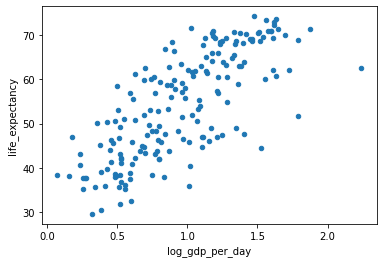

In [11]:
gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day','life_expectancy')

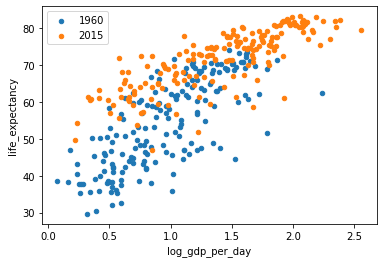

In [14]:
axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day','life_expectancy', label=1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day','life_expectancy', label=2015, color='C1', ax=axes)

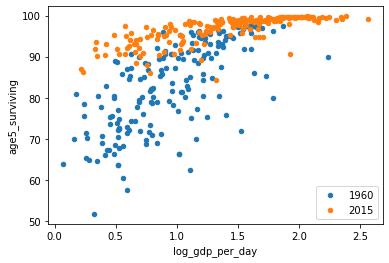

In [15]:
axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day','age5_surviving', label=1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day','age5_surviving', label=2015, color='C1', ax=axes)

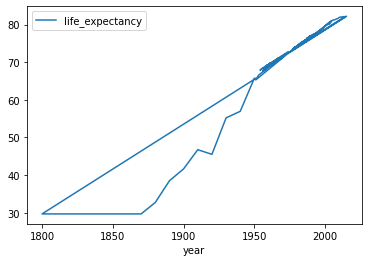

In [17]:
gapminder_by_country.loc['Italy'].plot('year', 'life_expectancy') # w/o sorting it looks strange

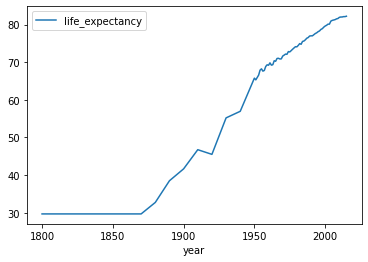

In [18]:
# so we add sorting
gapminder_by_country.loc['Italy'].sort_values('year').plot('year', 'life_expectancy') 

Text(0, 0.5, 'life expectancy')

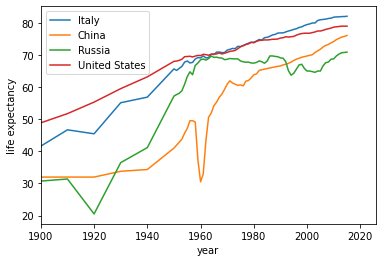

In [20]:
axes = gapminder_by_country.loc['Italy'].sort_values('year').plot('year', 'life_expectancy', label='Italy')
gapminder_by_country.loc['China'].sort_values('year').plot('year', 'life_expectancy', label='China', color='C1', ax=axes)
gapminder_by_country.loc['Russia'].sort_values('year').plot('year', 'life_expectancy', label='Russia', color='C2', ax=axes)
gapminder_by_country.loc['United States'].sort_values('year').plot('year', 'life_expectancy', label='United States', color='C3', ax=axes)

pp.axis(xmin=1900)
pp.ylabel('life expectancy')

In [21]:
gapminder.babies_per_woman.mean()

4.643471506105834

In [22]:
gapminder.groupby('year').babies_per_woman.mean()

year
1800    6.105028
1810    6.094254
1820    6.094396
1830    6.085879
1840    6.072802
          ...   
2011    2.925110
2012    2.892912
2013    2.863407
2014    2.830934
2015    2.799231
Name: babies_per_woman, Length: 81, dtype: float64

Text(0, 0.5, 'age 5 survival [%]')

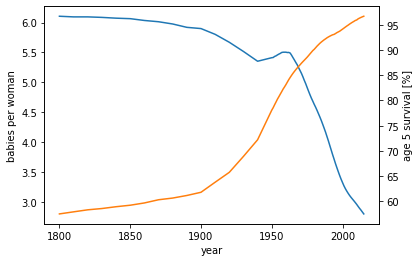

In [24]:
gapminder.groupby('year').babies_per_woman.mean().plot()
pp.ylabel('babies per woman')

gapminder.groupby('year').age5_surviving.mean().plot(secondary_y=True)
pp.ylabel('age 5 survival [%]')

In [25]:
# pivoting
gapminder.pivot_table('babies_per_woman', 'year', 'region')

region,Africa,America,Asia,Europe
year,,,,
1800,6.393208,6.055758,6.291923,5.561628
1810,6.394151,6.040000,6.281154,5.540233
1820,6.394340,6.031515,6.292692,5.545909
1830,6.395472,6.046364,6.285577,5.506591
1840,6.396226,6.046970,6.255577,5.486591
...,...,...,...,...
2011,4.569811,2.340000,2.736923,1.605227
2012,4.508868,2.315152,2.700769,1.606818
2013,4.447547,2.294242,2.664038,1.617727


Text(0.5, 1.0, 'babies per woman')

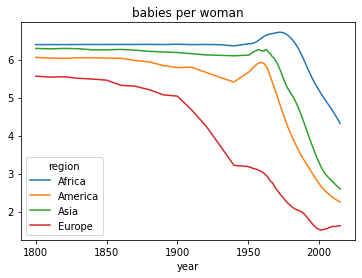

In [26]:
gapminder.pivot_table('babies_per_woman', 'year', 'region').plot()
pp.title('babies per woman')

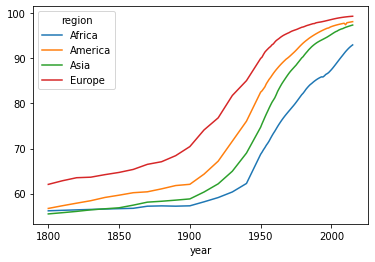

In [27]:
gapminder.pivot_table('age5_surviving', 'year', 'region').plot()